In [77]:
import pandas as pd
import numpy as np
import anndata as ad
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt

In [55]:
adata = ad.read("data/mus_musculus_preprocessed_all_params_with_gtm_1000.h5ad")

In [56]:
adata.var.columns

Index(['Accession', 'Chromosome', 'End', 'Start', 'Strand', 'sum_allele_c57',
       'sum_allele_cast', 'sum_ratio_allele_c57', 'sum_ratio_allele_cast',
       'ratio_sum_allele_c57', 'ratio_sum_allele_cast',
       'ratio_mean_allele_c57', 'ratio_mean_allele_cast',
       'ratio_std_allele_c57', 'ratio_std_allele_cast', 'allele_p_value',
       'gene_name', 'chromosome', 'autosomes', 'nuclear', 'Ribosomal_prot',
       'gene_count_corr', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma',
       'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood',
       'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s',
       'fit_variance', 'fit_alignment_scaling', 'velocity_genes', 'c57_kon',
       'c57_koff', 'c57_ksyn', 'cast_kon', 'cast_koff', 'cast_ksyn',
       'total_kon', 'total_koff', 'total_ksyn', 'spliced_kon', 'spliced_koff',
       'spliced_ksyn', 'unspliced_kon', 'unspliced_koff', 'unspliced_ksyn',
       'total_s_u_kon', 'total_s_u_koff', 'total_s_u_k

In [57]:
adata.var['cast_bs'] = adata.var['cast_ksyn']/adata.var['cast_koff']
adata.var['c57_bs'] = adata.var['c57_ksyn']/adata.var['c57_koff']
adata.var['total_bs'] = adata.var['total_ksyn']/adata.var['total_koff']

adata.var['cast_bf'] = adata.var['cast_kon']
adata.var['c57_bf'] = adata.var['c57_kon']
adata.var['total_bf'] = adata.var['total_kon']

In [58]:
df = adata.var[['cast_bs', 'c57_bs', 'total_bs', 'cast_bf', 'c57_bf', 'total_bf', 'gtm_total_bs',
                'gtm_total_bf', 'gtm_cast_bs', 'gtm_cast_bf', 'gtm_c57_bs','gtm_c57_bf' ]]

In [59]:
df = df.dropna()
df

,cast_bs,c57_bs,total_bs,cast_bf,c57_bf,total_bf,gtm_total_bs,gtm_total_bf,gtm_cast_bs,gtm_cast_bf,gtm_c57_bs,gtm_c57_bf
Gene,,,,,,,,,,,,
Mrpl15,15.946756,15.743812,24.584943,0.122347,0.137540,0.175476,30.175938,0.086455,16.615584,0.074548,16.396010,0.080623
4732440D04Rik,2.716637,3.035545,3.025959,0.699138,0.779018,1.358319,19.636256,0.184956,20.533216,0.090923,26.357739,0.081355
Cops5,10.939161,20.714896,9.849518,1.147452,0.784568,2.557655,45.777937,0.497830,34.853115,0.292236,40.876105,0.275836
Arfgef1,5.884419,5.956399,3.814466,0.575572,0.562565,1.560758,10.698688,0.512663,30.295548,0.091505,18.795183,0.148841
Tram1,2.860091,3.240180,5.335522,3.621442,3.433453,4.037842,31.688989,0.618891,23.840762,0.395564,18.146082,0.591736
...,...,...,...,...,...,...,...,...,...,...,...,...
Exosc7,8.493003,8.439157,7.855627,0.615424,0.638748,1.348519,27.638682,0.326350,17.228319,0.221549,19.595044,0.227992
Lars2,4.715019,9.418359,3.433188,0.447942,0.110824,0.978933,27.854896,0.097801,27.728833,0.061037,13.557589,0.046888
Sacm1l,4.619438,5.001986,7.426186,0.405336,0.431688,0.573285,6.102013,0.438511,10.162776,0.130894,9.259375,0.157248


In [62]:
df['log_cast_bs'] = np.log10(df['cast_bs'])
df['log_cast_bf'] = np.log10(df['cast_bf'])
df['log_gtm_cast_bs'] = np.log10(df['gtm_cast_bs'])
df['log_gtm_cast_bf'] = np.log10(df['gtm_cast_bf'])

df['log_c57_bs'] = np.log10(df['c57_bs'])
df['log_c57_bf'] = np.log10(df['c57_bf'])
df['log_gtm_c57_bs'] = np.log10(df['gtm_c57_bs'])
df['log_gtm_c57_bf'] = np.log10(df['gtm_c57_bf'])

df['log_total_bs'] = np.log10(df['total_bs'])
df['log_total_bf'] = np.log10(df['total_bf'])
df['log_gtm_total_bs'] = np.log10(df['gtm_total_bs'])
df['log_gtm_total_bf'] = np.log10(df['gtm_total_bf'])

In [86]:
correlations = df.corr()
correlations['log_total_bf']['log_gtm_total_bf']

0.5870522300224188

In [69]:
correlations['log_total_bf']['log_gtm_total_bf']

0.5870522300224188

In [72]:
binwidth = 0.1
x_bins = np.arange(0,2.0, binwidth)

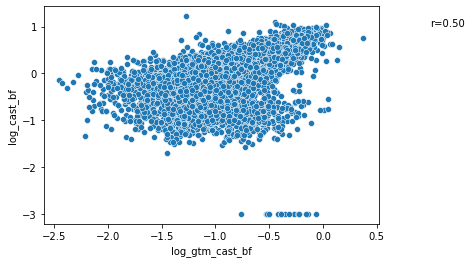

In [85]:
sns.scatterplot(data=df, x="log_gtm_cast_bf", y="log_cast_bf")
r, p = sp.stats.pearsonr(x=np.array(df['log_gtm_cast_bf']), y=np.array(df['log_cast_bf']))
plt.text(1, 1, 'r={:.2f}'.format(r))
plt.show()

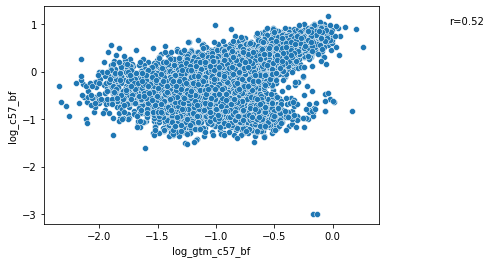

In [87]:
sns.scatterplot(data=df, x="log_gtm_c57_bf", y="log_c57_bf")
r, p = sp.stats.pearsonr(x=np.array(df['log_gtm_c57_bf']), y=np.array(df['log_c57_bf']))
plt.text(1, 1, 'r={:.2f}'.format(r))
plt.show()

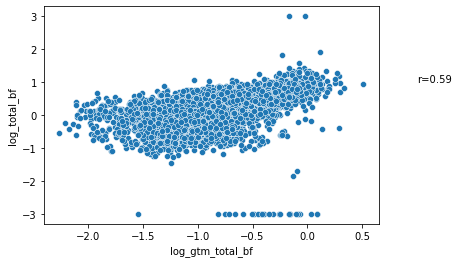

In [88]:
sns.scatterplot(data=df, x="log_gtm_total_bf", y="log_total_bf")
r, p = sp.stats.pearsonr(x=np.array(df['log_gtm_total_bf']), y=np.array(df['log_total_bf']))
plt.text(1, 1, 'r={:.2f}'.format(r))
plt.show()

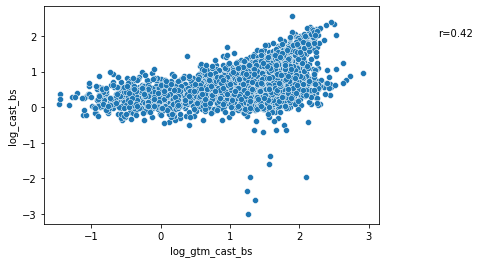

In [96]:
sns.scatterplot(data=df, x="log_gtm_cast_bs", y="log_cast_bs")
r, p = sp.stats.pearsonr(x=np.array(df['log_gtm_cast_bs']), y=np.array(df['log_cast_bs']))
plt.text(4, 2, 'r={:.2f}'.format(r))
plt.show()

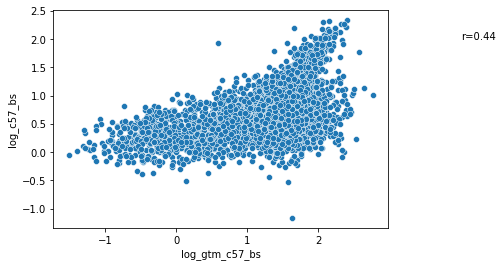

In [97]:
sns.scatterplot(data=df, x="log_gtm_c57_bs", y="log_c57_bs")
r, p = sp.stats.pearsonr(x=np.array(df['log_gtm_c57_bs']), y=np.array(df['log_c57_bs']))
plt.text(4, 2, 'r={:.2f}'.format(r))
plt.show()

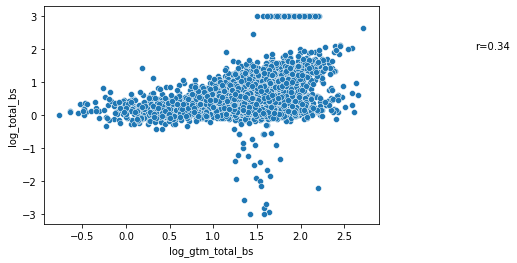

In [98]:
sns.scatterplot(data=df, x="log_gtm_total_bs", y="log_total_bs")
r, p = sp.stats.pearsonr(x=np.array(df['log_gtm_total_bs']), y=np.array(df['log_total_bs']))
plt.text(4, 2, 'r={:.2f}'.format(r))
plt.show()